# Python을 이용한 기술통계 실습

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic = pd.read_csv("titanic.csv")

## STEP1 데이터 속성 및 기술통계량 확인

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## STEP2 목표변수 및 설명변수의 분포 확인

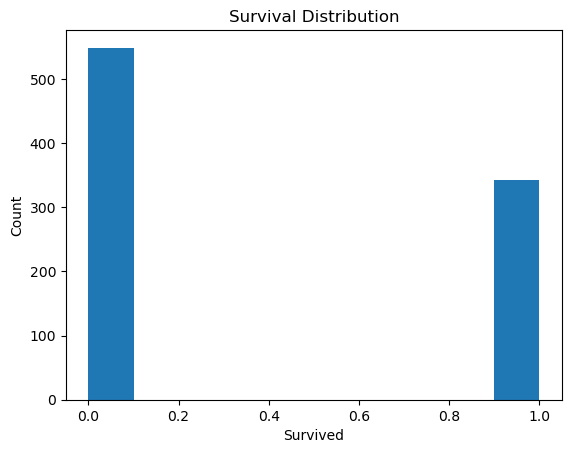

In [31]:
plt.hist(titanic['Survived'])
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

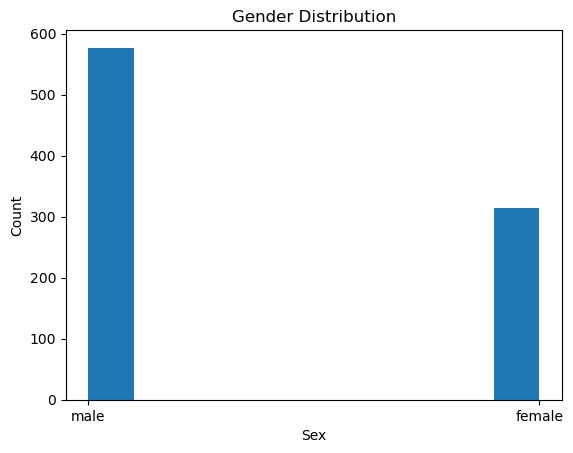

In [32]:
plt.hist(titanic['Sex'])
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

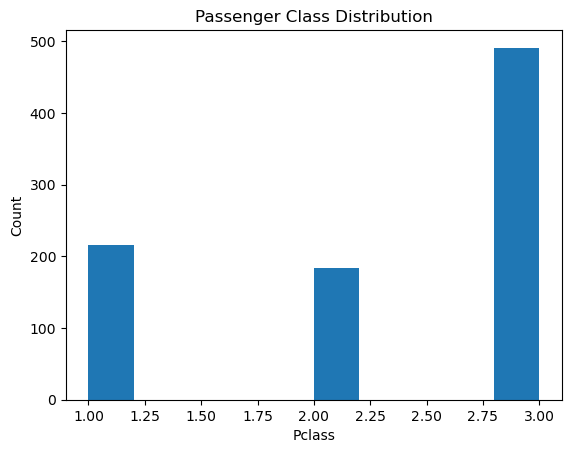

In [33]:
plt.hist(titanic['Pclass'])
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

## STEP3 변수들의 결측 및 이상치 처리

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Cabin(객실 번호)는 결측치가 매우 많고 분석에 영향을 주지 않으므로 삭제
new_titanic = titanic.drop(['Cabin'], axis=1)

In [10]:
new_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
#위의 titanic.describe(include=['O']) 코드에서 Embarked(승객이 탑승한 곳)이
#S가 644명으로 가장 많으므로 2개의 결측치를 S로 대체
new_titanic["Embarked"].fillna("S",inplace= True)
new_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
new_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
new_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [14]:
bins = [0, 14, 28, 45, 56, 100]
labels = ['Child', 'Young', 'Middle', 'Prime', 'Old']
new_titanic['AgeGroup'] = pd.cut(new_titanic['Age'], bins=bins, labels=labels)

new_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middle


효과적인 분석을 위하여 파생변수 생성(나이에 대한 파생변수)

In [15]:
new_titanic['Family'] = new_titanic['SibSp'] + new_titanic['Parch'] + 1
new_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middle,1


효과적인 분석을 위하여 파생변수 생성(가족과의 동반 여부)

In [16]:
bins = [0, 50, 100, 150, 200, 1000]
labels = [0, 1, 2, 3, 4]
new_titanic['FareBand'] = pd.cut(new_titanic['Fare'], bins=bins, labels=labels)
new_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Family,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middle,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middle,1,0


효과적인 분석을 위하여 파생변수 생성(요금 구간화)

## STEP4 그래프 분석을 통해 변수간 관계를 확인

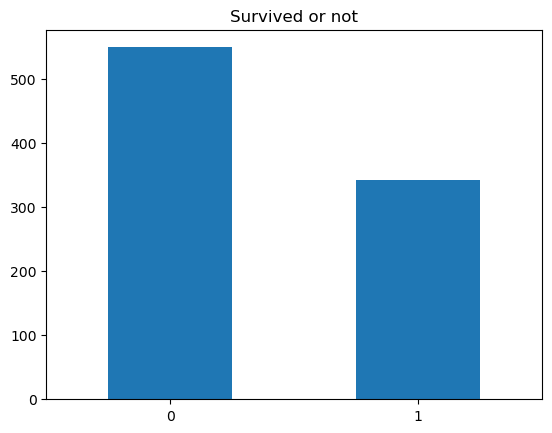

In [17]:
survived_counts = new_titanic['Survived'].value_counts()
survived_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Survived or not')
plt.show()

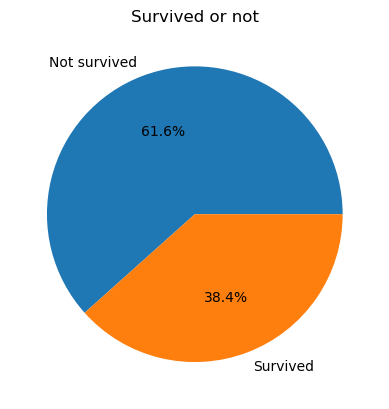

In [18]:
survived_counts = new_titanic['Survived'].value_counts()
labels = ['Not survived', 'Survived']
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.title('Survived or not')
plt.show()

목표 변수에 대한 빈도수와 비율은 위와 같다

<Axes: xlabel='Sex,Survived'>

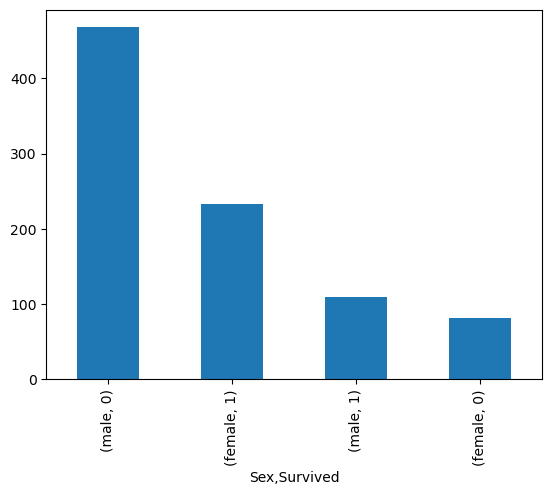

In [19]:
ti_count = new_titanic[["Sex","Survived"]].value_counts()
ti_count.plot.bar()

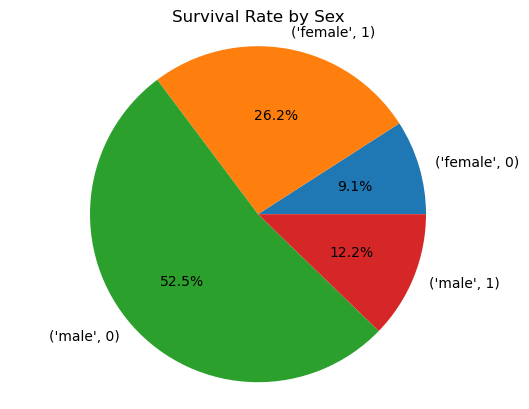

In [20]:
survived_counts = new_titanic.groupby(['Sex', 'Survived'])['Survived'].count()

plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
plt.title('Survival Rate by Sex')
plt.axis('equal')
plt.show()

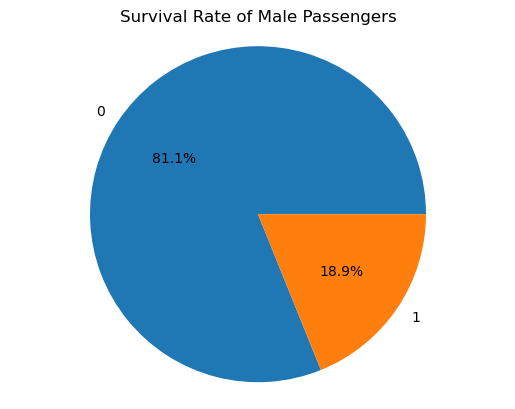

In [21]:
male_survived_counts = new_titanic[new_titanic['Sex']=='male']['Survived'].value_counts()

plt.pie(male_survived_counts, labels=male_survived_counts.index, autopct='%1.1f%%')
plt.title('Survival Rate of Male Passengers')
plt.axis('equal')
plt.show()

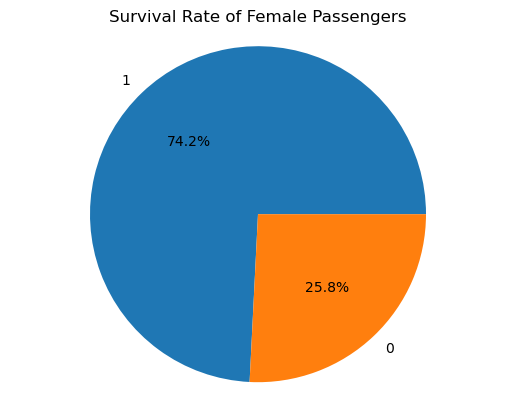

In [22]:
female_survived_counts = new_titanic[new_titanic['Sex']=='female']['Survived'].value_counts()

plt.pie(female_survived_counts, labels=female_survived_counts.index, autopct='%1.1f%%')
plt.title('Survival Rate of Female Passengers')
plt.axis('equal')
plt.show()

남자는 577명 여자는 314명임을 감안해도 성별과 생존여부는 유의미한 관계가 있다

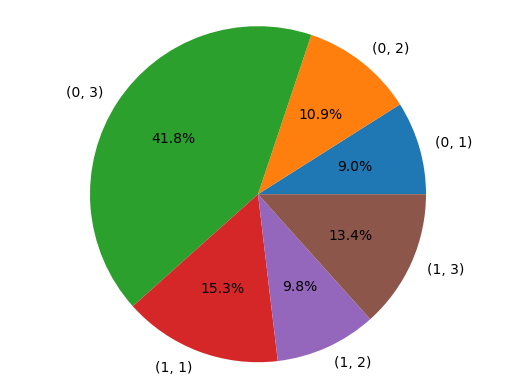

In [24]:
survived_by_pclass = new_titanic.groupby(['Survived', 'Pclass']).size()

plt.pie(survived_by_pclass, labels=survived_by_pclass.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

승객 등급과 생존여부는 유의미하게 낮은 등급의 승객이 생존하지 못한 경우가 많다.

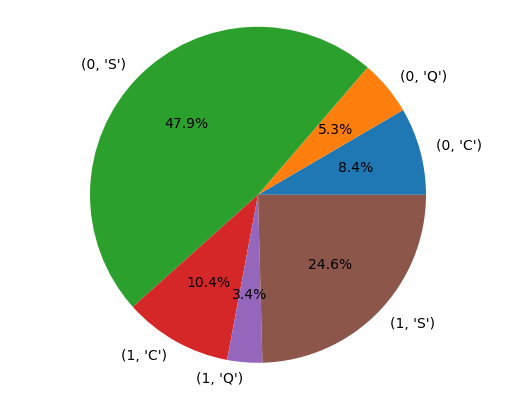

In [25]:
survived_by_embarked = new_titanic.groupby(['Survived', 'Embarked']).size()

plt.pie(survived_by_embarked, labels=survived_by_embarked.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

승객 등급과 생존여부는 유의미하게 Southampton에서 탑승한 승객이 생존한 경우가 많다.

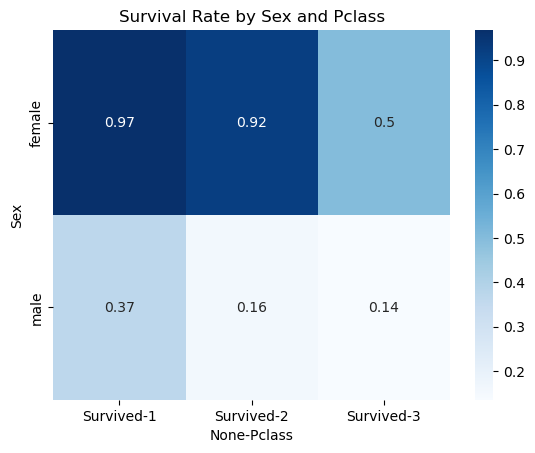

In [27]:
data = new_titanic[['Sex', 'Survived', 'Pclass']]

data = pd.pivot_table(data, index=['Sex'], columns=['Pclass'], values=['Survived'], aggfunc='mean')

sns.heatmap(data, annot=True, cmap='Blues')
plt.title('Survival Rate by Sex and Pclass')
plt.show()

객실등급이 높을수록, 여성일수록 생존률이 높다.